# Investigation of the loss function landscape

## Imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm.auto import tqdm

myparams = {
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}',
    'font.family': 'Djvu Serif',
    'font.size': 16,
    'axes.grid': True,
    'grid.alpha': 0.1,
    'lines.linewidth': 2
}
plt.rcParams.update(myparams)

%config InlineBackend.figure_format = "retina"
%load_ext autoreload
%autoreload 2

np.random.seed(307)

## Synthetic regression

We set
- Dimension of the parameters vector `n_features`
- Mean and covariance matrix of the $x$ distribution `mu` and `Sigma`
- Precision of the parameters vector `alpha`
- Variance of the random noise `sigma2`

After that we
- Create the $x$ disribution `x_distr`
- Sample a parameters vector `w` from its distribution

In [3]:
import scipy.stats as st

n_features = 2

mu = np.zeros(n_features) # expectation of x
Sigma = np.identity(n_features) # covariance matrix of x
alpha = 1
sigma2 = 1

x_distr = st.multivariate_normal(mean=mu, cov=Sigma)
w = st.multivariate_normal(mean=np.zeros(n_features), cov=alpha**(-1)*np.identity(n_features)).rvs(size=1)

In [4]:
def mse_loss(w, X, y):
    return np.mean((y - X @ w)**2)

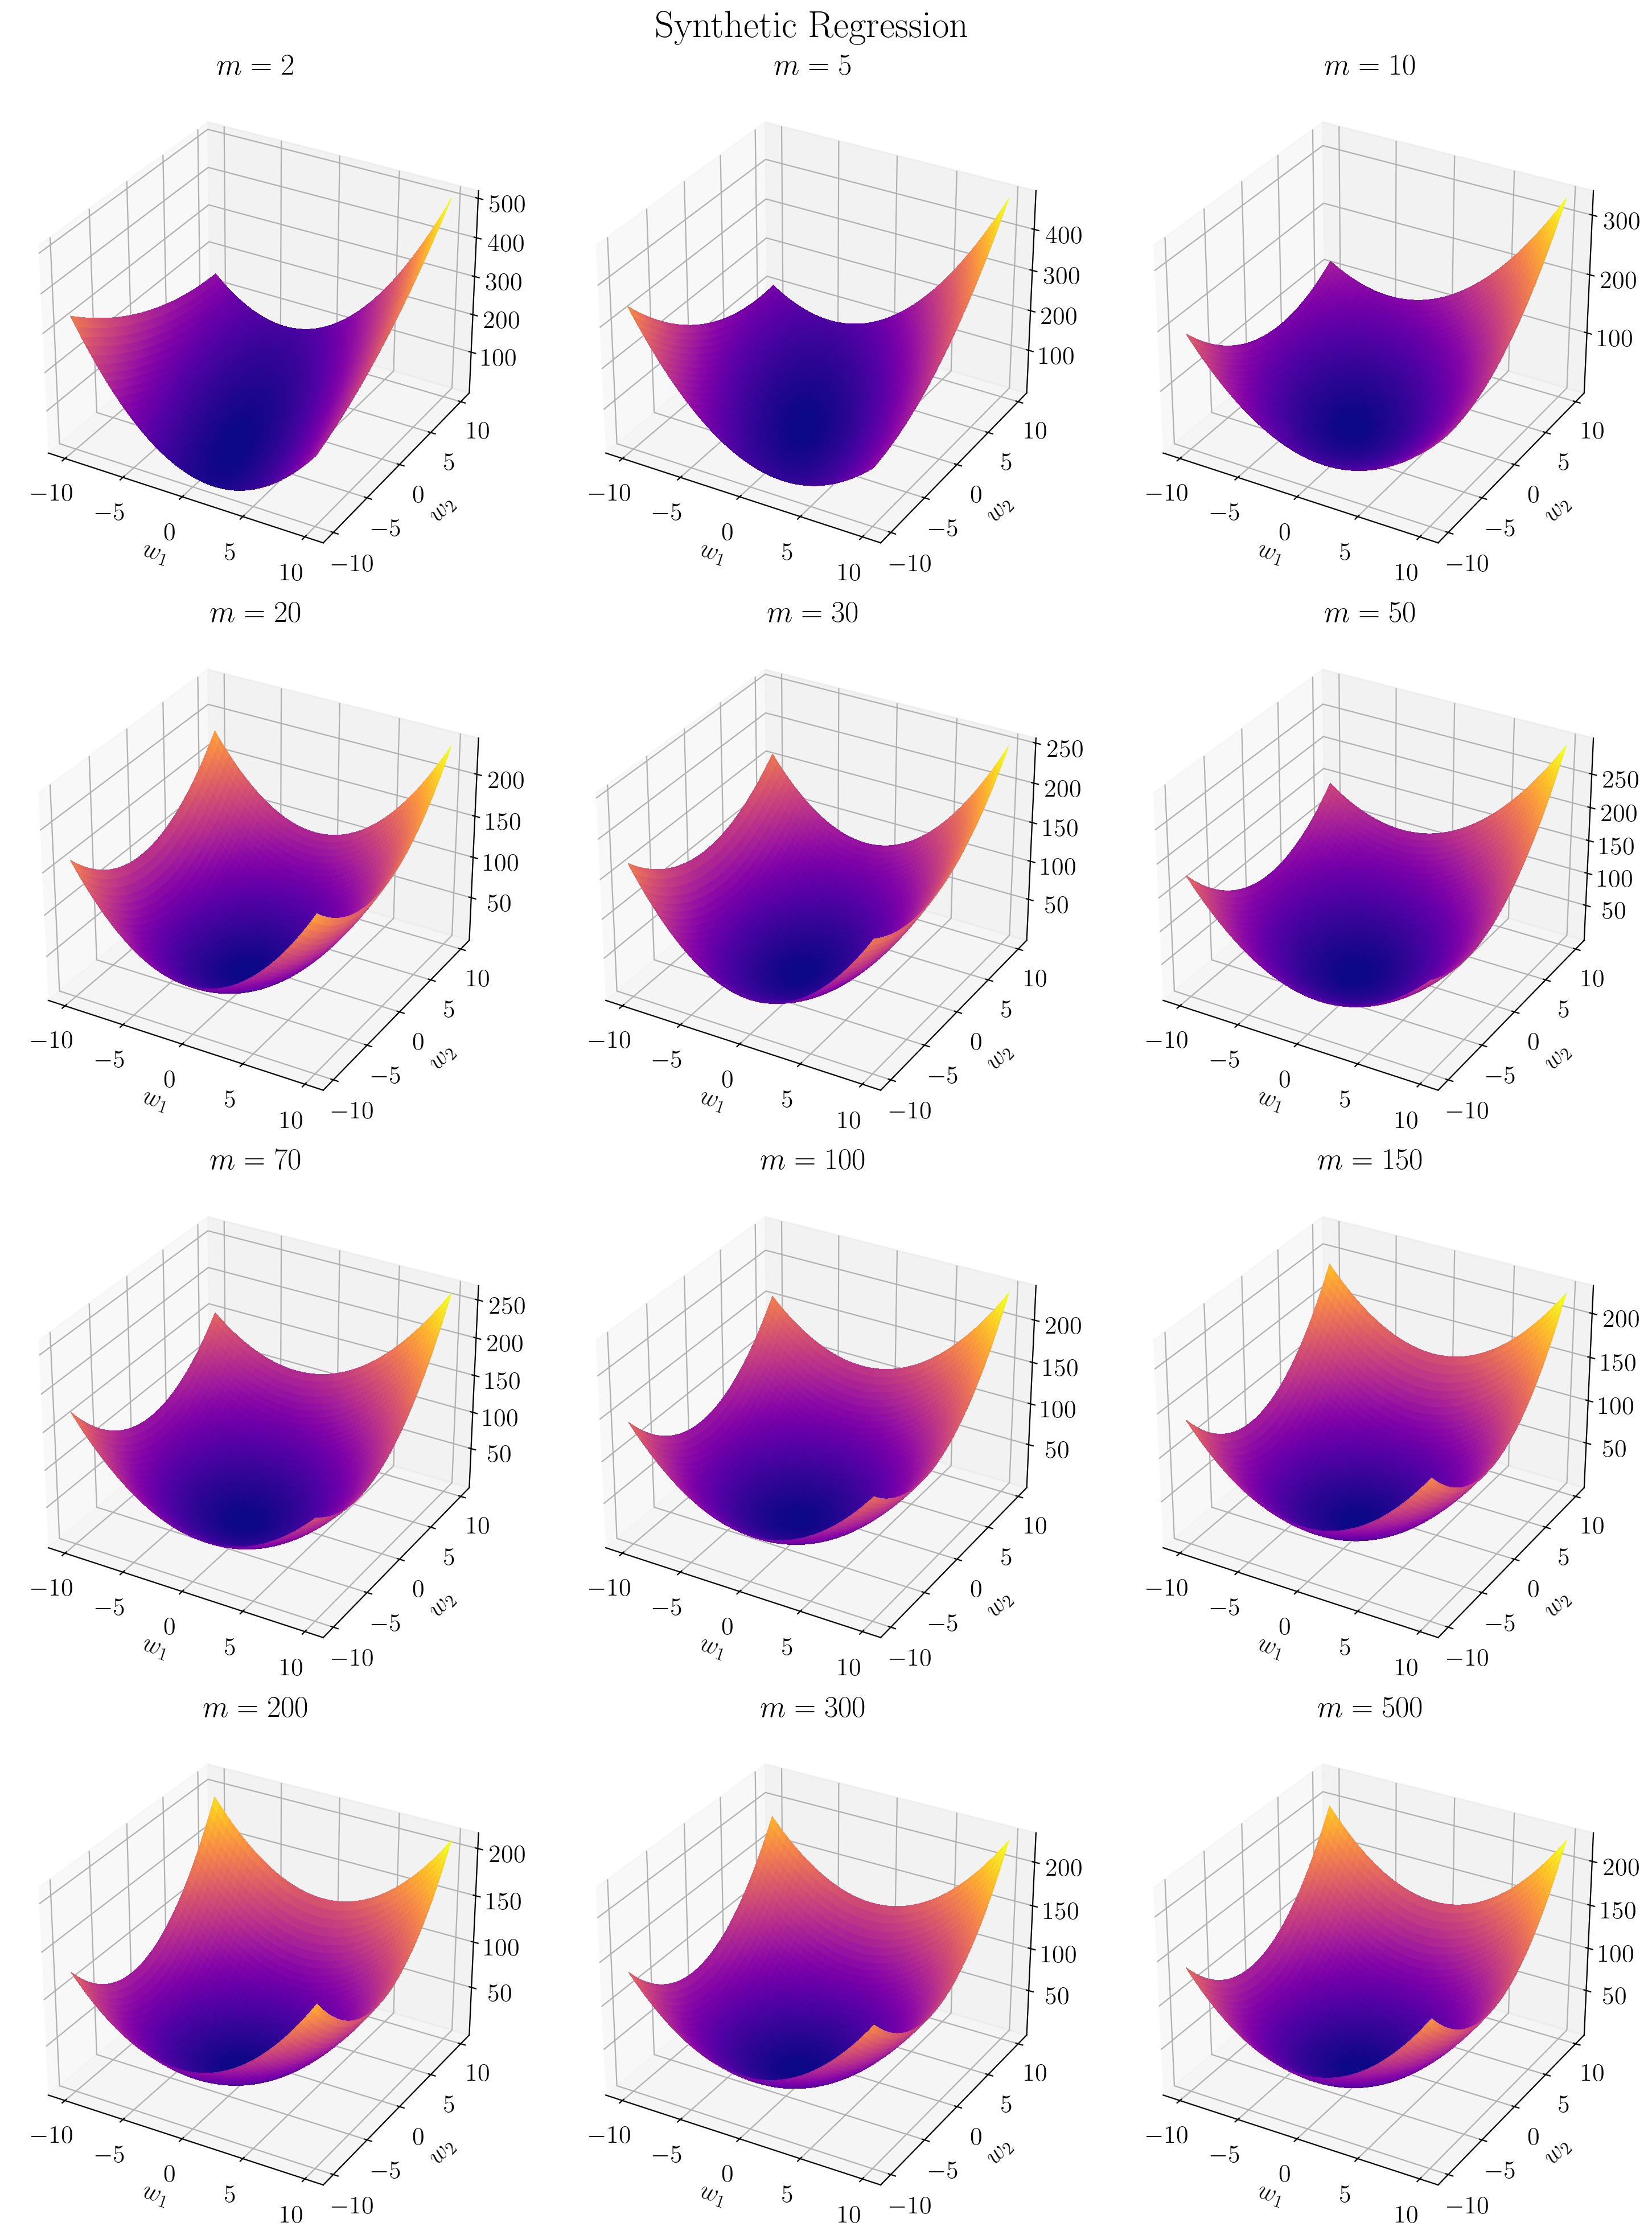

In [22]:
fig, axs = plt.subplots(4, 3, figsize=(15, 20), subplot_kw=dict(projection='3d'))
#fig, axs = plt.subplots(4, 3, figsize=(15, 20))

sample_sizes = [2, 5, 10, 20, 30, 50, 70, 100, 150, 200, 300, 500]
n_features = 2
w1 = np.linspace(-10, 10, 50)
w2 = np.linspace(-10, 10, 50)
w1, w2 = np.meshgrid(w1, w2)
W = np.stack((w1, w2), axis=-1)

X = np.array([])

for i, ax in enumerate(axs.flat):

    n_samples = sample_sizes[i]
    samples = x_distr.rvs(size=(n_samples - len(X)))
    X = np.vstack((X, samples)) if len(X) > 0 else samples
    eps = st.multivariate_normal(mean=np.zeros(n_samples), cov=sigma2*np.identity(n_samples)).rvs(size=1)
    y = X @ w + eps
    z = np.array([mse_loss(w, X, y) for w in W.reshape(-1, 2)]).reshape(w1.shape)
    
    ax.plot_surface(w1, w2, z, rstride=1, cstride=1, linewidth=0, antialiased=False, cmap='plasma')
    #ax.contour(w1, w2, z)
    ax.set_xlabel('$w_1$')
    ax.set_ylabel('$w_2$')
    #ax.set_zlabel(r'$\mathcal{L}(w)$')
    ax.set_title(f'$m = {n_samples}$')

plt.suptitle('Synthetic Regression', fontsize=24)
plt.tight_layout()
plt.show()

## Synthetic Classification

In [23]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def log_loss(w, X, y):    
    return -1 * np.mean(np.log(sigmoid(y * (X @ w))))

We set
- Dimension of the parameters vector `n_features`
- Mean and covariance matrix of the $x$ distribution `mu` and `Sigma`
- Precision of the parameters vector `alpha`

After that we
- Create the $x$ disribution `X_distr`
- Sample a parameters vector `w` from its distribution

In [24]:
import scipy.stats as st

n_features = 2

mu = np.zeros(n_features) # expectation of x
Sigma = np.identity(n_features) # covariance matrix of x
alpha = 1

x_distr = st.multivariate_normal(mean=mu, cov=Sigma)
w = st.multivariate_normal(mean=np.zeros(n_features), cov=alpha**(-1)*np.identity(n_features)).rvs(size=1)

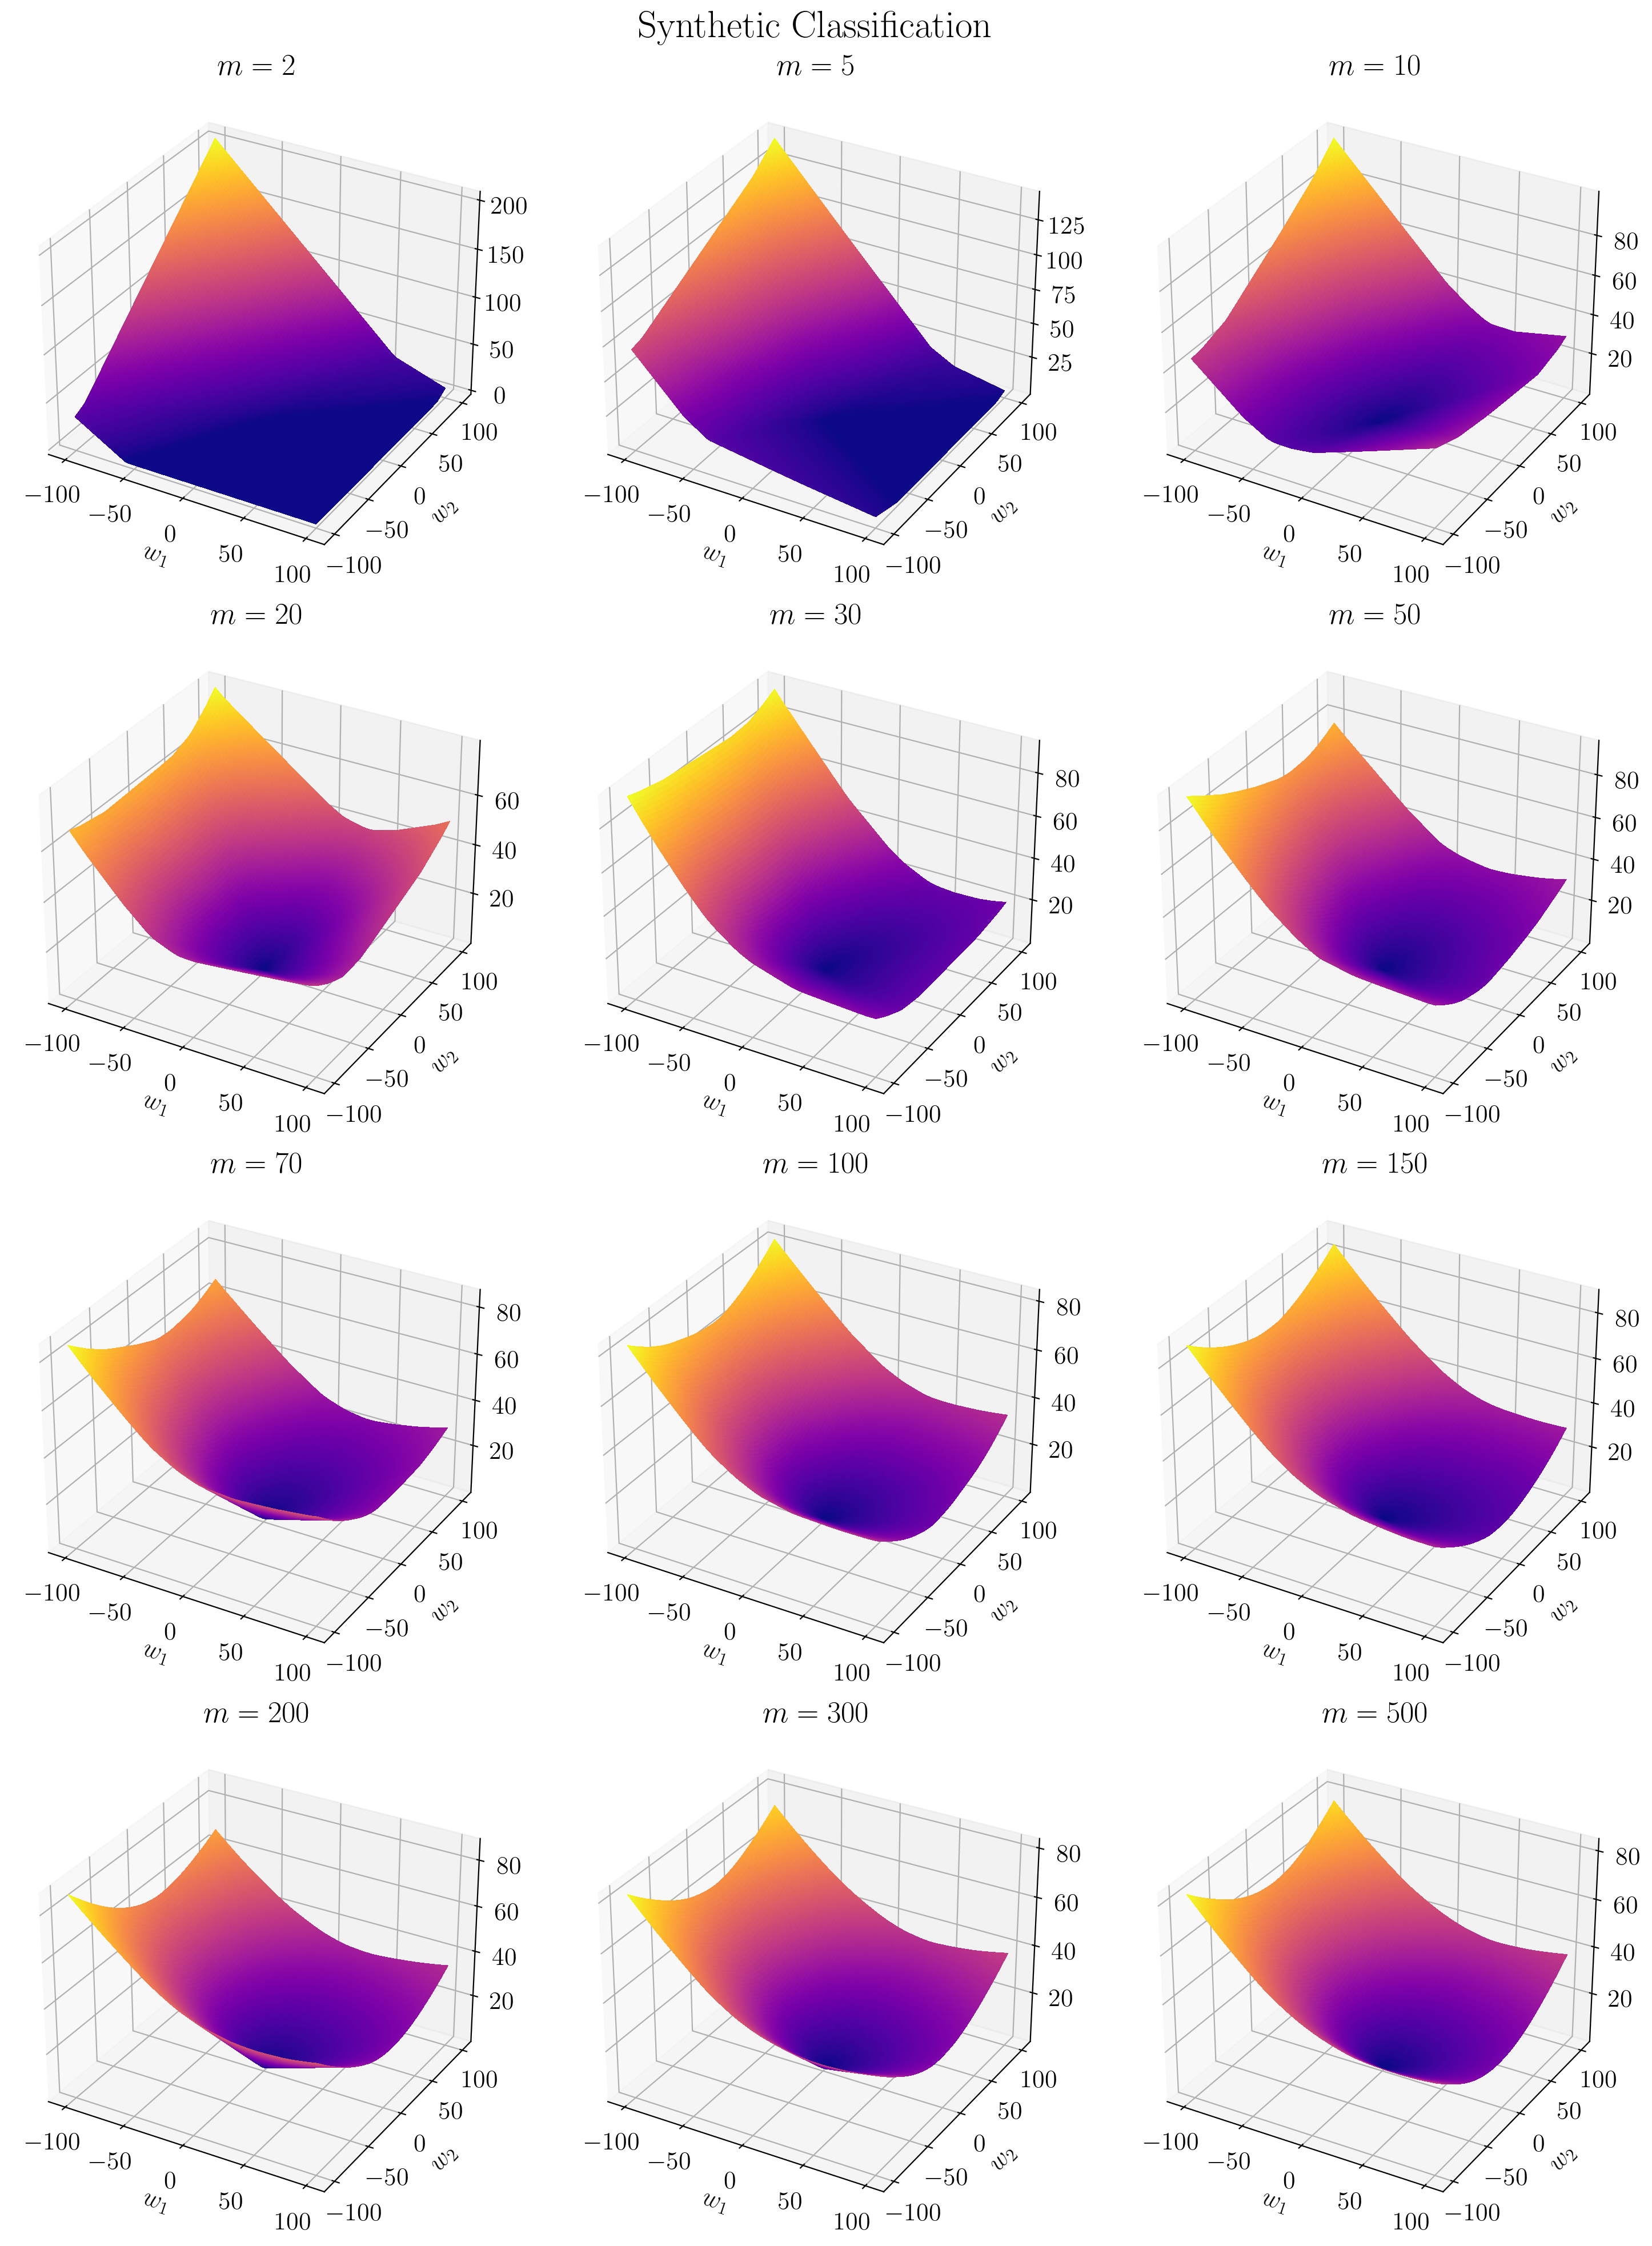

In [25]:
fig, axs = plt.subplots(4, 3, figsize=(15, 20), subplot_kw=dict(projection='3d'))
#fig, axs = plt.subplots(4, 3, figsize=(15, 20))

sample_sizes = np.array([2, 5, 10, 20, 30, 50, 70, 100, 150, 200, 300, 500])
n_features = 2
w1 = np.linspace(-100, 100, 100)
w2 = np.linspace(-100, 100, 100)
w1, w2 = np.meshgrid(w1, w2)
W = np.stack((w1, w2), axis=-1)

X = np.array([])

for i, ax in enumerate(axs.flat):

    n_samples = sample_sizes[i]
    samples = x_distr.rvs(size=(n_samples - len(X)))
    X = np.vstack((X, samples)) if len(X) > 0 else samples
    y = st.bernoulli(p=sigmoid(X @ w)).rvs(size=n_samples)
    y[y == 0] = -1
    z = np.array([log_loss(w, X, y) for w in W.reshape(-1, 2)]).reshape(w1.shape)
    
    ax.plot_surface(w1, w2, z, rstride=1, cstride=1, linewidth=0, antialiased=False, cmap='plasma')
    #ax.contour(w1, w2, z)
    ax.set_xlabel('$w_1$')
    ax.set_ylabel('$w_2$')
    #ax.set_zlabel(r'$\mathcal{L}(w)$')
    ax.set_title(f'$m = {n_samples}$')

plt.suptitle('Synthetic Classification', fontsize=24)
plt.tight_layout()
plt.show()